In [1]:
from numpy.random import uniform 
import matplotlib.pyplot as plt
import numpy as np

# unknown true values of the position 

x_0 = 10 # alpha
y_0  = 30 # beta

In [18]:
# generate draws from uniform distribution of thetas
theta_array = uniform(-np.pi/2,np.pi/2,1000)

In [19]:
# generate x-locations
xn_array = y_0 * np.tan(theta_array) + x_0

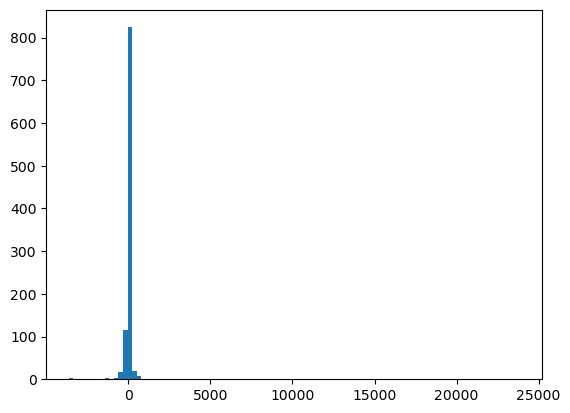

In [20]:
plt.hist(xn_array, bins=100)
plt.show()

In [21]:
# make grid search 
x_0_array = np.linspace(0, 50, 250)
y_0_array = np.linspace(0, 50, 250)



In [22]:
def ln_posterior_datum(x_0_assay,y_0_assay,datum):
    # contribution to the posterior from one datum (we ignore an additive constant)
    return np.log(y_0_assay / (y_0_assay**2 + (x_0_assay - datum)**2))

In [23]:
def grid_search(x_0_array, y_0_array, datum):
    # create meshgrid for x_0 and y_0 ranges
    X_0, Y_0 = np.meshgrid(x_0_array, y_0_array)

    # initialize array to store log posterior values
    posterior_grid = np.zeros_like(X_0)

    for i, X in enumerate(X_0):
        for j, Y in enumerate(Y_0):
            posterior_grid[i,j] = ln_posterior_datum(X[i],Y[j],datum)

    return posterior_grid

In [24]:
# the posterior canvas
posterior_full = np.zeros((len(x_0_array),len(y_0_array)))

In [30]:
posterior_full.shape

(250, 250)

0
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
1
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/var/folders/r9/vf1sqnrn01n0nzmbl59dbqjc0000gn/T/ipykernel_3175/809796487.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(y_0_assay / (y_0_assay**2 + (x_0_assay - datum)**2))
/var/folders/r9/vf1sqnrn01n0nzmbl59dbqjc0000gn/T/ipykernel_3175/227966202.py:9: RuntimeWarning: invalid value encountered in divide
  exp_posterior_full_plot = np.divide(np.exp(posterior_full_no_nan), np.nansum(np.exp(posterior_full_no_nan))) # normalize for plotting


2
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
3
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
4
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
5
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
6
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
7
[[nan nan nan ... nan nan na

KeyboardInterrupt: 

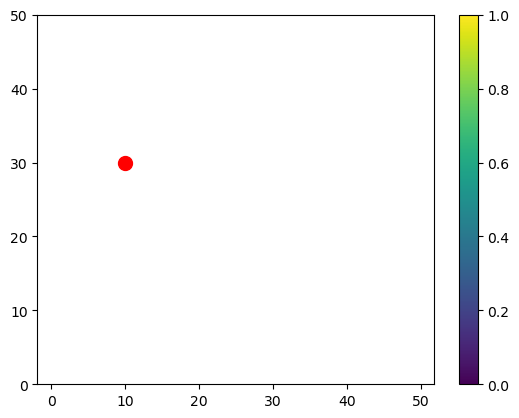

In [37]:
# loop over each data point 
for n_datum in range(len(xn_array)):
    print(n_datum)

    posterior_full = np.nansum([posterior_full, grid_search(x_0_array,y_0_array,xn_array[n_datum])], axis=0)
    #print(np.nansum(np.exp(posterior_full)))

    posterior_full_no_nan = np.nan_to_num(posterior_full, nan=-np.inf)
    exp_posterior_full_plot = np.divide(np.exp(posterior_full_no_nan), np.nansum(np.exp(posterior_full_no_nan))) # normalize for plotting


    # save a plot each time as the data comes in
    #exp_posterior_full_plot = np.divide(np.exp(posterior_full), np.nansum(np.exp(posterior_full))) # normalize for plotting
    print(exp_posterior_full_plot)
    
    plt.clf()
    plt.imshow(exp_posterior_full_plot, extent = (0, 50, 0, 50), origin = 'lower', cmap = 'plasma')
    plt.scatter([x_0], [y_0], color = 'red', s = 100)
    plt.axis('equal')
    plt.colorbar()
    plt.savefig(f'posterior_plot_{n_datum:04d}.png')  

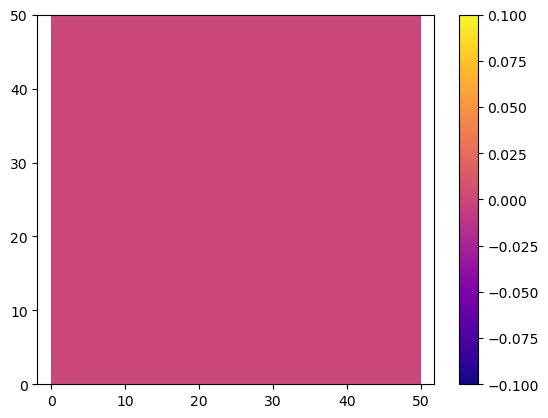

In [18]:
plt.imshow(np.exp(posterior_full), extent = (0, 50, 0, 50), origin = 'lower', cmap = 'plasma')
plt.axis('equal')
plt.colorbar()
plt.show()

In [12]:
np.nanmax(posterior_full)

np.float64(-1016.3214449240566)